<a href="https://colab.research.google.com/github/vendo495/projects/blob/main/Lending_club_loan_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
loan_data = pd.read_csv("/content/loan_data.csv")

# Display the first few rows of the dataset
loan_data.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
# One-hot encoding the 'purpose' column
loan_data_encoded = pd.get_dummies(loan_data, columns=['purpose'], drop_first=True)

# Display the first few rows of the transformed dataset
loan_data_encoded.head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Check for missing values
missing_values = loan_data_encoded.isnull().sum()

# Display missing values
missing_values[missing_values > 0]


Series([], dtype: int64)

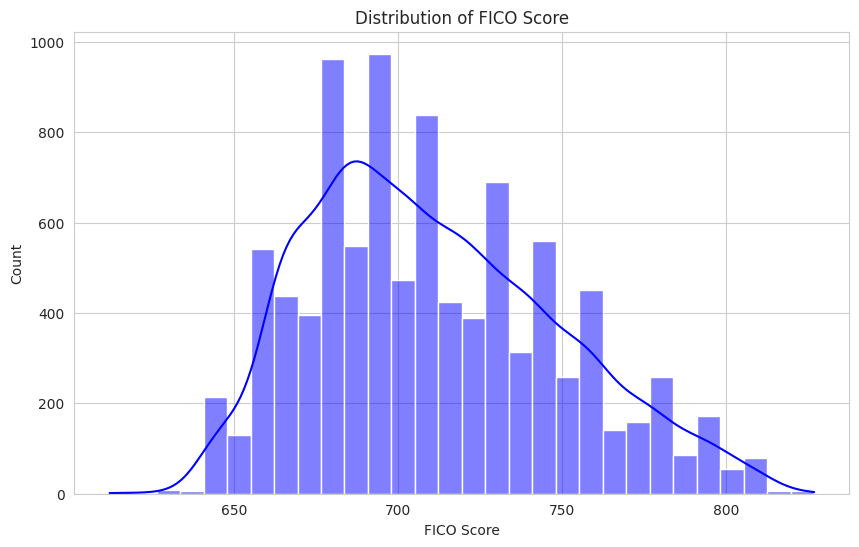

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Distribution of the FICO score
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_encoded['fico'], bins=30, kde=True, color='blue')
plt.title('Distribution of FICO Score')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.show()


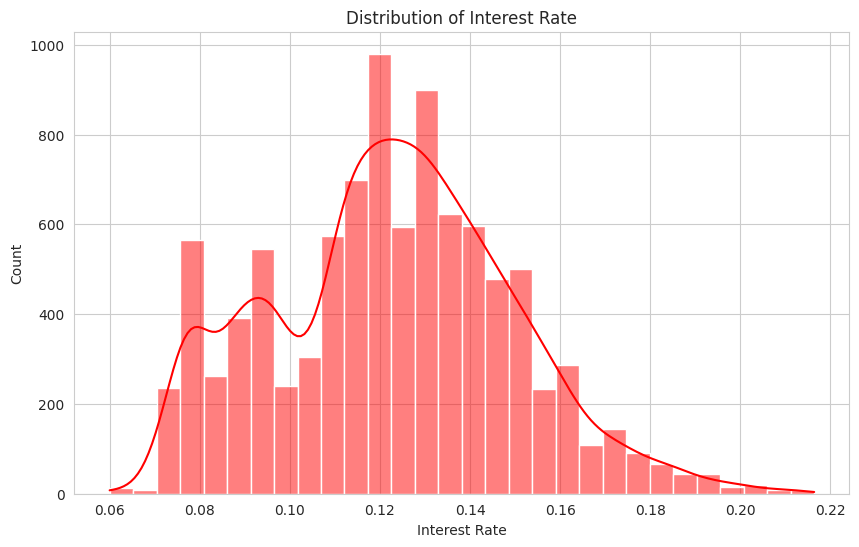

In [ ]:
# Distribution of the interest rate
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_encoded['int.rate'], bins=30, kde=True, color='red')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.show()


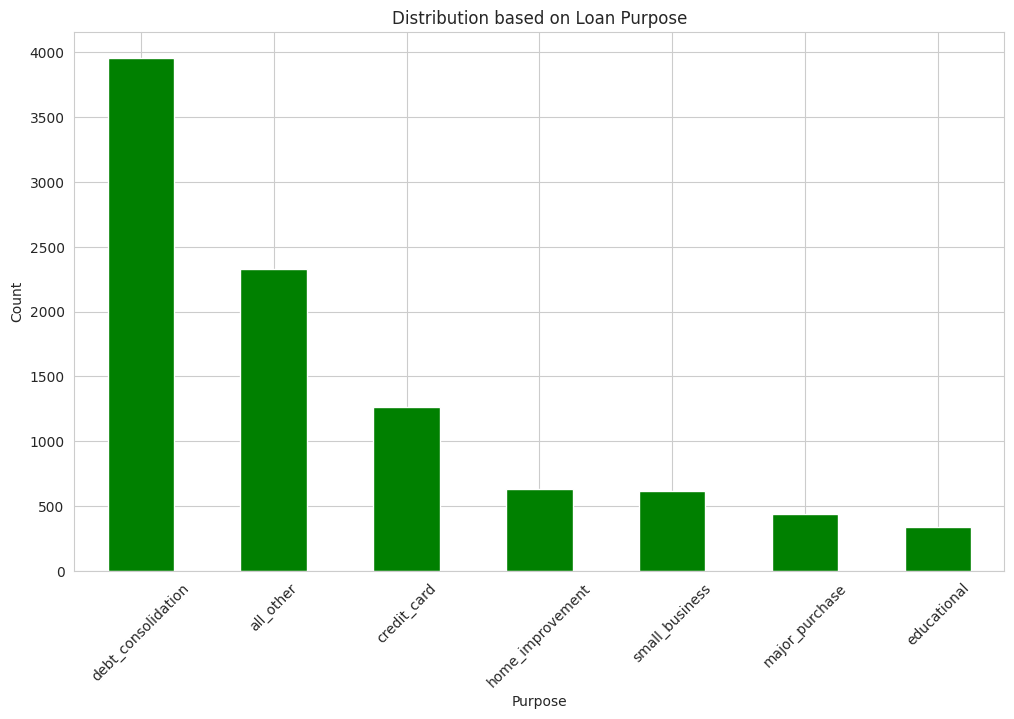

In [ ]:
# Distribution based on loan purpose
loan_purpose_dist = loan_data['purpose'].value_counts()

plt.figure(figsize=(12, 7))
loan_purpose_dist.plot(kind='bar', color='green')
plt.title('Distribution based on Loan Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


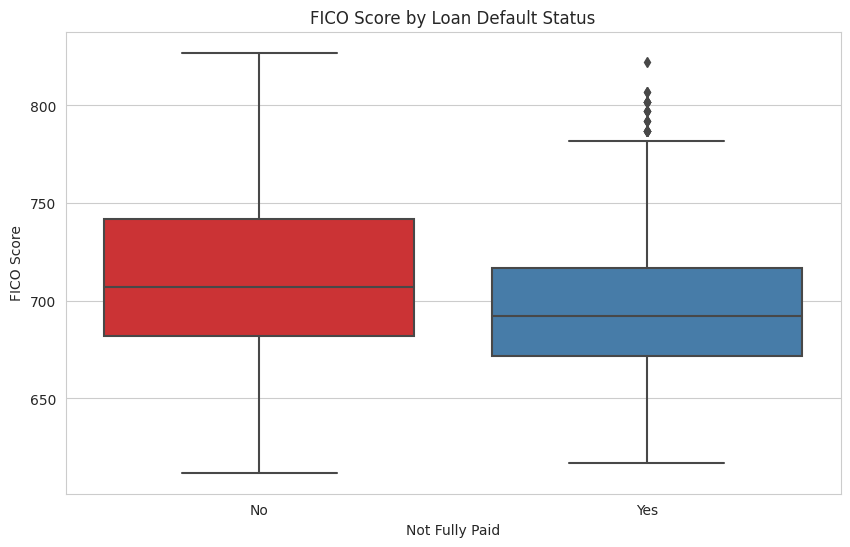

In [ ]:
# Relationship between FICO score and loan default status
plt.figure(figsize=(10, 6))
sns.boxplot(x='not.fully.paid', y='fico', data=loan_data_encoded, palette='Set1')
plt.title('FICO Score by Loan Default Status')
plt.xlabel('Not Fully Paid')
plt.ylabel('FICO Score')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


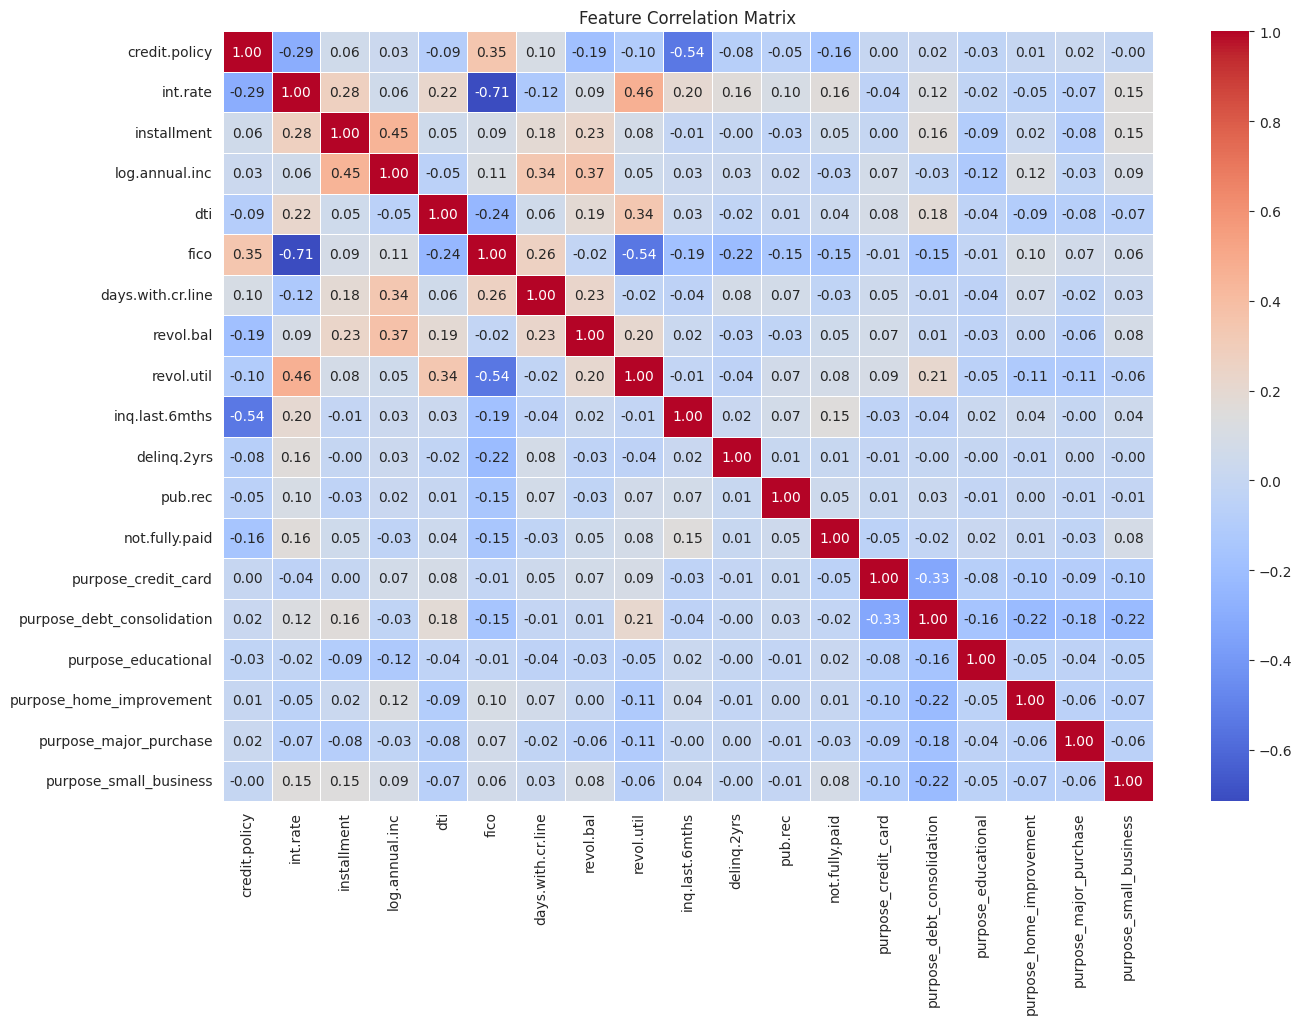

In [ ]:
# Compute the correlation matrix
correlation_matrix = loan_data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target (y)
X = loan_data_encoded.drop('not.fully.paid', axis=1)
y = loan_data_encoded['not.fully.paid']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((6704, 18), (2874, 18))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the model
model = Sequential()

# Input layer
model.add(Dense(18, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 18)                342       
                                                                 
 dense_9 (Dense)             (None, 32)                608       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1495 (5.84 KB)
Trainable params: 1495 (5

In [ ]:
model = Sequential()


In [ ]:
# Input layer
model.add(Dense(18, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/100
210/210 [==============================] - 2s 5ms/step - loss: 0.5485 - accuracy: 0.7807 - val_loss: 0.4371 - val_accuracy: 0.8379
Epoch 2/100
210/210 [==============================] - 1s 5ms/step - loss: 0.4721 - accuracy: 0.8364 - val_loss: 0.4190 - val_accuracy: 0.8379
Epoch 3/100
210/210 [==============================] - 1s 5ms/step - loss: 0.4549 - accuracy: 0.8399 - val_loss: 0.4169 - val_accuracy: 0.8379
Epoch 4/100
210/210 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.8407 - val_loss: 0.4135 - val_accuracy: 0.8379
Epoch 5/100
210/210 [==============================] - 1s 3ms/step - loss: 0.4352 - accuracy: 0.8407 - val_loss: 0.4142 - val_accuracy: 0.8379
Epoch 6/100
210/210 [==============================] - 1s 3ms/step - loss: 0.4325 - accuracy: 0.8407 - val_loss: 0.4130 - val_accuracy: 0.8379
Epoch 7/100
210/210 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.8410 - val_loss: 0.4111 - val_accuracy: 0.8379

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


90/90 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8344
Test Loss: 0.42637899518013
Test Accuracy: 0.8343771696090698


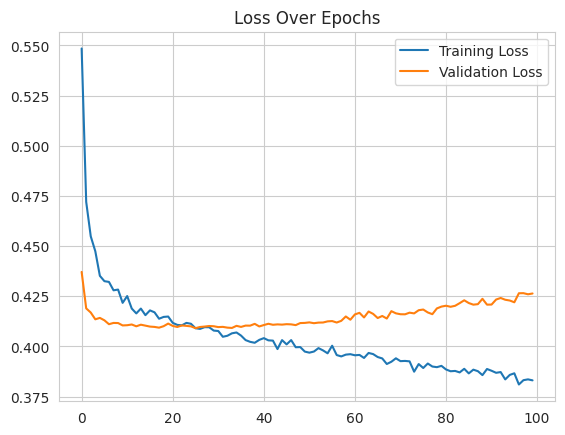

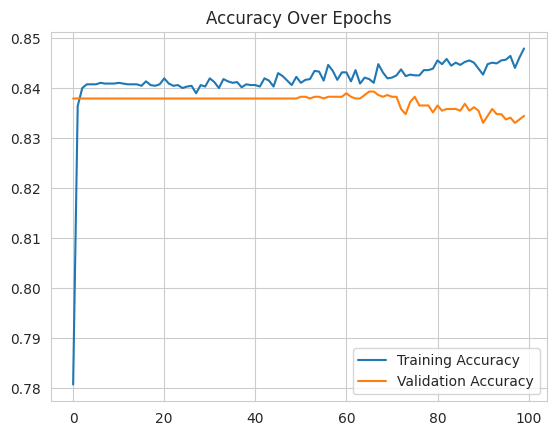

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()
